In [1]:
import os 
import sys

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting

plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
tracer = 'ELG_LOPnotqso'
region = 'GCcomb'
zrange = (1.1, 1.6)
version = 'v4_1fixran'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version)
nmocks = 25

template_name = 'shapefitqisoqap'

emulator_dir = os.path.join(data_dir, 'emulators/emulators_{}_{}'.format(template_name, tracer))
chains_dir = os.path.join(data_dir, 'chains', 'chains_{}_{{}}_z{:.3f}-z{:.3f}_{{}}_{}'.format(template_name, zrange[0], zrange[1], region), 'physicalpriorbasis')

chain_altmtl_thetacut_25mocks = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'corr_velocileptors_ezmockscov_thetacut0.05_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

chains_complete = [Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'corr_mock{}_velocileptors_ezmockscov_{:d}.npy'.format(imock, i))).remove_burnin(0.5)[::10] for i in range(8)]) for imock in range(nmocks)]
chains_complete_thetacut = [Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'corr_importance_mock{}_velocileptors_ezmockscov_thetacut0.05.npy'.format(imock))) for imock in range(nmocks)]
chains_altmtl = [Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'corr_mock{}_velocileptors_ezmockscov_{:d}.npy'.format(imock, i))).remove_burnin(0.5)[::10] for i in range(8)]) for imock in range(nmocks)]
chains_altmtl_thetacut = [Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'corr_mock{}_velocileptors_ezmockscov_thetacut0.05_{:d}.npy'.format(imock, i))).remove_burnin(0.5)[::10] for i in range(8)]) for imock in range(nmocks)]

qiso
Y1 error:  0.01665496325352485
theta-cut - complete: 1.0763435034899516e-05 +- 2.8418983728301913e-05 (0.065% of DR1 error)
altmtl - complete: -0.003126264450147476 +- 0.0024925049858054316 (-18.771% of DR1 error)
theta-cut altmtl - complete: -0.0032781061213483253 +- 0.0024412376374267257 (-19.682% of DR1 error)
qap
Y1 error:  0.032451065140344085
theta-cut - complete: -2.437179884626772e-05 +- 6.871150748427785e-05 (-0.075% of DR1 error)
altmtl - complete: -0.03248472235345435 +- 0.0064123259379493276 (-100.104% of DR1 error)
theta-cut altmtl - complete: 0.00700050927333911 +- 0.006433657324685855 (21.573% of DR1 error)
dm
Y1 error:  0.052458928959552745
theta-cut - complete: 6.601075681495176e-05 +- 7.085069565014979e-05 (0.126% of DR1 error)
altmtl - complete: 0.039767933300950485 +- 0.00818074754016121 (75.808% of DR1 error)
theta-cut altmtl - complete: 0.017240615967053556 +- 0.008081940422670231 (32.865% of DR1 error)
df
Y1 error:  0.09079799285080725
theta-cut - complete: 

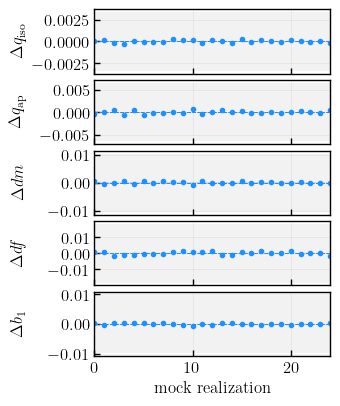

In [7]:
plt.rcParams["figure.autolayout"] = False

params = ['qiso', 'qap', 'dm', 'df', 'b1p']
ncols = len(params)
figsize = (3.5, ncols/1.2)
fig, lax = plt.subplots(ncols, 1, figsize=figsize, sharex=True)

diff_mean_list = []
diff_std_list = []
desi_y1_err_list = []

for iparam, param in enumerate(params):
    bestfit_vals = np.array([chain.mean(param) for chain in chains_complete])
    bestfit_vals_thetacut = np.array([chain.mean(param) for chain in chains_complete_thetacut])
    bestfit_diff = bestfit_vals_thetacut - bestfit_vals
    
    bestfit_vals_altmtl = np.array([chain.mean(param) for chain in chains_altmtl])
    bestfit_diff_altmtl = bestfit_vals_altmtl - bestfit_vals
    bestfit_vals_altmtl_thetacut = np.array([chain.mean(param) for chain in chains_altmtl_thetacut])
    bestfit_diff_altmtl_thetacut = bestfit_vals_altmtl_thetacut - bestfit_vals

    diff_mean = np.mean(bestfit_diff)
    diff_mean_list.append(diff_mean)
    diff_std = np.std(bestfit_diff)/5.
    diff_std_list.append(diff_std)

    diff_mean_altmtl = np.mean(bestfit_diff_altmtl)
    diff_std_altmtl = np.std(bestfit_diff_altmtl)/5.
    diff_mean_altmtl_thetacut = np.mean(bestfit_diff_altmtl_thetacut)
    diff_std_altmtl_thetacut = np.std(bestfit_diff_altmtl_thetacut)/5.

    # DESI Y1 error
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    desi_y1_err_list.append(desi_y1_err)
    
    print(param)
    print('Y1 error: ', desi_y1_err)
    print('theta-cut - complete:', diff_mean, '+- {}'.format(diff_std), '({:.3f}% of DR1 error)'.format(diff_mean/desi_y1_err*100))
    print('altmtl - complete:', diff_mean_altmtl, '+- {}'.format(diff_std_altmtl), '({:.3f}% of DR1 error)'.format(diff_mean_altmtl/desi_y1_err*100))
    print('theta-cut altmtl - complete:', diff_mean_altmtl_thetacut, '+- {}'.format(diff_std_altmtl_thetacut), '({:.3f}% of DR1 error)'.format(diff_mean_altmtl_thetacut/desi_y1_err*100))
    
    x = np.arange(len(bestfit_diff))
    ax = lax[iparam]
    ax.axhline(0, ls='--', color='grey', lw=0.7)
    ax.axhline(diff_mean, ls='--', color='C0', lw=0.7)
    ax.fill_between(x, diff_mean - diff_std, diff_mean + diff_std, facecolor='C0', alpha=0.2)
    ax.plot(x, bestfit_diff, marker='.', ls='')
    #ax.axhline(diff_mean_altmtl, ls='--', color='C1', lw=0.7)
    #ax.fill_between(x, diff_mean_altmtl - diff_std_altmtl, diff_mean_altmtl + diff_std_altmtl, facecolor='C1', alpha=0.2)
    #ax.plot(x, bestfit_diff_altmtl, marker='.', ls='', color='C1')
    ax.set_ylabel(r'$\Delta$'+chains_complete[0].params()[param].latex(inline=True))
    
    ax.fill_between(x, -desi_y1_err/5., desi_y1_err/5., facecolor='grey', alpha=0.1)
    #ax.set_ylim(-desi_y1_err/4.5, desi_y1_err/4.5)
    ax.set_xlim(0, np.max(x))
    
ax.set_xlabel('mock realization')
fig = plt.gcf()
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(os.path.join(plots_dir, version, 'corr_mean_posterior_{}mocks_{}_complete_{}_z{:.1f}-{:.1f}_thetacut0.05_firstparams.pdf'.format(nmocks, tracer, region, zrange[0], zrange[1])), dpi=300)
plt.show()

b2p
Y1 error:  0.5537755842604636
theta-cut - complete: -0.00013518531625715646 +- 0.0021566749965960747 (-0.024% of DR1 error)
bsp
Y1 error:  0.5961963564237527
theta-cut - complete: 5.508426384509546e-05 +- 0.0016712297670877063 (0.009% of DR1 error)
alpha0p
Y1 error:  8.122135732807319
theta-cut - complete: -0.005058253126096189 +- 0.00690691474934472 (-0.062% of DR1 error)
alpha2p
Y1 error:  9.747449861973863
theta-cut - complete: -0.0017789851025442633 +- 0.0072844577785598375 (-0.018% of DR1 error)
alpha4p
Y1 error:  7.792293303778313
theta-cut - complete: -0.0026623208383145134 +- 0.030438773594575336 (-0.034% of DR1 error)


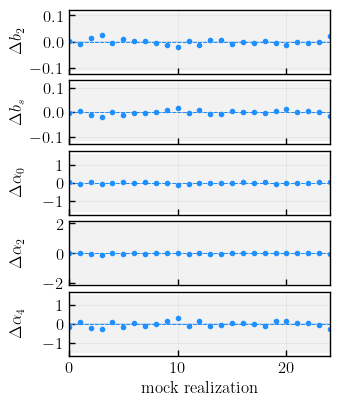

In [8]:
params = ['b2p', 'bsp', 'alpha0p', 'alpha2p', 'alpha4p']
ncols = len(params)
figsize = (3.5, ncols/1.2)
fig, lax = plt.subplots(ncols, 1, figsize=figsize, sharex=True)

diff_mean_list = []
diff_std_list = []
desi_y1_err_list = []

for iparam, param in enumerate(params):
    bestfit_vals = np.array([chain.mean(param) for chain in chains_complete])
    bestfit_vals_thetacut = np.array([chain.mean(param) for chain in chains_complete_thetacut])
    bestfit_diff = bestfit_vals_thetacut - bestfit_vals

    diff_mean = np.mean(bestfit_diff)
    diff_mean_list.append(diff_mean)
    diff_std = np.std(bestfit_diff)/5.
    diff_std_list.append(diff_std)
    
    # DESI Y1 error
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    desi_y1_err_list.append(desi_y1_err)

    print(param)
    print('Y1 error: ', desi_y1_err)
    print('theta-cut - complete:', diff_mean, '+- {}'.format(diff_std), '({:.3f}% of DR1 error)'.format(diff_mean/desi_y1_err*100))
    
    x = np.arange(len(bestfit_diff))
    ax = lax[iparam]
    ax.axhline(0, ls='--', color='grey', lw=0.7)
    ax.axhline(diff_mean, ls='--', color='C0', lw=0.7)
    ax.fill_between(x, diff_mean - diff_std, diff_mean + diff_std, facecolor='C0', alpha=0.2)
    ax.plot(x, bestfit_diff, marker='.', ls='')
    ax.set_ylabel(r'$\Delta$'+chains_complete[0].params()[param].latex(inline=True))
    
    ax.fill_between(x, -desi_y1_err/5., desi_y1_err/5., facecolor='grey', alpha=0.1)
    #ax.set_ylim(-desi_y1_err/4.5, desi_y1_err/4.5)
    ax.set_xlim(0, np.max(x))
    
ax.set_xticks([0, 10, 20])
ax.set_xlabel('mock realization')
fig = plt.gcf()
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(os.path.join(plots_dir, version, 'corr_mean_posterior_{}mocks_{}_complete_{}_z{:.1f}-{:.1f}_thetacut0.05_otherparams.pdf'.format(nmocks, tracer, region, zrange[0], zrange[1])), dpi=300)
plt.show()

In [32]:
import tabulate

quantities = ['', r'$\theta$-cut complete', r'altMTL', r'$\theta$-cut altMTL', 'DR1 error']
data = []
for param in ['qiso', 'qap', 'dm', 'df', 'b1p', 'b2p', 'bsp']:
    row = []
    param_latex = chain_altmtl_thetacut_25mocks[0][param].param.latex(inline=True)
    rowname = r'{} $-$ {}$(\mathrm{{complete}})$'.format(param_latex, param_latex)
    row.append(rowname)
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    
    bestfit_vals_complete = np.array([chain.mean(param) for chain in chains_complete])
    
    for i, chains in enumerate([chains_complete_thetacut, chains_altmtl, chains_altmtl_thetacut]):
        bestfit_vals = np.array([chain.mean(param) for chain in chains])
        bestfit_diff = bestfit_vals - bestfit_vals_complete

        diff_mean = np.mean(bestfit_diff)
        diff_std = np.std(bestfit_diff)/5.
        if i==0:
            row.append(r'${:.5f} \pm {:.5f}$'.format(diff_mean, diff_std))
        else:
            row.append(r'${:.3f} \pm {:.3f}$'.format(diff_mean, diff_std))
    row.append(r'{:.2g}'.format(desi_y1_err))
    data.append(row)
tab = tabulate.tabulate(data, headers=quantities, tablefmt='latex_raw')
print(tab)

\begin{tabular}{llllr}
\hline
                                                                & $\theta$-cut complete   & altMTL             & $\theta$-cut altMTL   &   DR1 error \\
\hline
 $q_{\mathrm{iso}}$ $-$ $q_{\mathrm{iso}}$$(\mathrm{complete})$ & $0.00001 \pm 0.00003$   & $-0.003 \pm 0.002$ & $-0.003 \pm 0.002$    &       0.017 \\
 $q_{\mathrm{ap}}$ $-$ $q_{\mathrm{ap}}$$(\mathrm{complete})$   & $-0.00002 \pm 0.00007$  & $-0.032 \pm 0.006$ & $0.007 \pm 0.006$     &       0.032 \\
 $dm$ $-$ $dm$$(\mathrm{complete})$                             & $0.00007 \pm 0.00007$   & $0.040 \pm 0.008$  & $0.017 \pm 0.008$     &       0.052 \\
 $df$ $-$ $df$$(\mathrm{complete})$                             & $0.00012 \pm 0.00018$   & $0.047 \pm 0.016$  & $-0.013 \pm 0.016$    &       0.091 \\
 $b_{1}$ $-$ $b_{1}$$(\mathrm{complete})$                       & $0.00002 \pm 0.00006$   & $-0.002 \pm 0.007$ & $0.003 \pm 0.007$     &       0.049 \\
 $b_{2}$ $-$ $b_{2}$$(\mathrm{complete})$          